In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('mushrooms.csv')
Y = df.iloc[:,0].values
df = df.iloc[:,1:].apply(LabelEncoder().fit_transform)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [3]:
labels = np.unique(Y)
Y = LabelEncoder().fit_transform(Y)

In [4]:
def PCA(X, dimensions = 2):
    X = X - np.tile(np.mean(X, 0), (X.shape[0], 1))
    _, eigenvectors = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, eigenvectors[:, :dimensions])
    return Y

def euclidean_distance(x, y):
    return np.sqrt(np.sum(np.square(x-y)))

In [5]:
X = PCA(MinMaxScaler().fit_transform(df.values))
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
class KNN:
    def __init__(self, k):
        self.K = k
    def _vote(self, label):
        counts = np.bincount(label)
        return np.argmax(counts)
    def predict(self, test_X, train_X, train_Y):
        Y = np.empty(test_X.shape[0])
        for i, test_sample in enumerate(test_X):
            idx = np.argsort([euclidean_distance(test_sample, x) for x in train_X])[:self.K]
            nearest_neighbors = np.array([train_Y[i] for i in idx])
            Y[i] = self._vote(nearest_neighbors)
        return Y

In [7]:
accuracy_test = np.mean(test_Y == KNN(5).predict(test_X, train_X, train_Y))

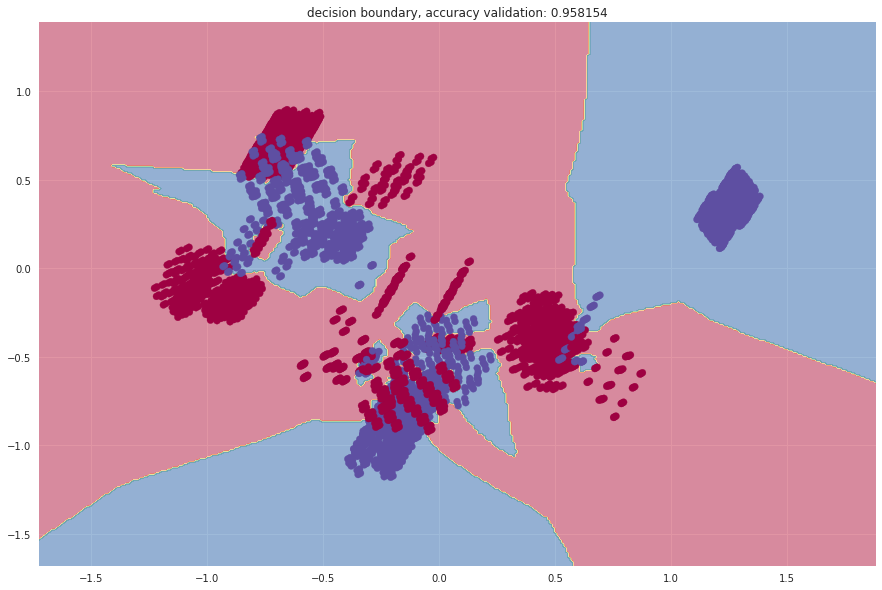

In [9]:
plt.figure(figsize=(15, 10))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = KNN(5).predict(np.c_[xx.ravel(), yy.ravel()], train_X, train_Y)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha = 0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title('decision boundary, accuracy validation: %f'%(accuracy_test))
plt.show()